In [389]:
#-------------------------------------------------------------------------------
# Name:        module1
# Purpose:
#
# Author:      Saurabh kumar
#
# Created:     30/09/2017
# Copyright:   (c) Saurabh kumar 2017
# Licence:     <your licence>
#-------------------------------------------------------------------------------

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import scipy.io
import math as m
%matplotlib inline
import matplotlib.mlab as mlab
from random import randint

# Q1 De-beeper

### 1.1

In [98]:
import scipy.io.wavfile
signal = scipy.io.wavfile.read("x.wav", mmap=False)
frequency = signal[0]
sound = signal[1]

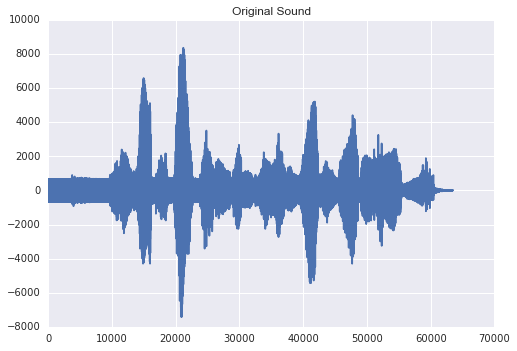

In [376]:
plt.title("Original Sound")
plt.plot(sound)
plt.show()

### 1.2 - Create DFT matrix

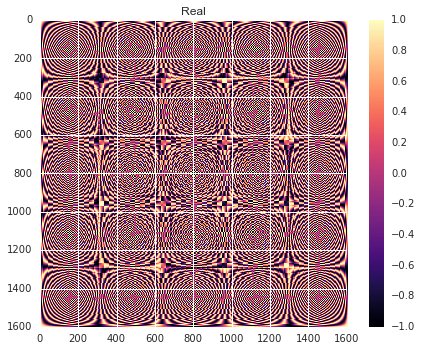

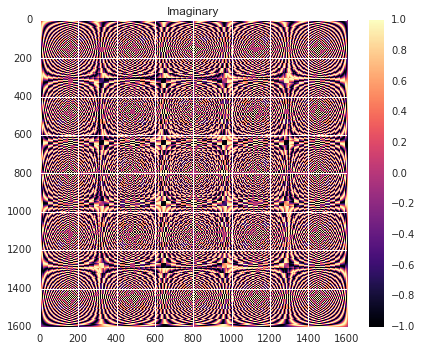

In [375]:
#Frame Size
N = 1600
n = (np.arange(N)).reshape(1,N)
f = (np.arange(N)).reshape(N,1)

#Real and Imaginary Part calculation
R = np.cos(2*(np.pi)*f*n/N)
I =  np.sin(2*(np.pi)*f*n/N)       

#complex number DFT matrix
F = R - 1j*I

plt.title("Real")
plt.imshow(R, cmap='magma', interpolation='nearest')
plt.colorbar()
plt.show()

plt.title("Imaginary")
plt.imshow(I, cmap='magma', interpolation='nearest')
plt.colorbar()
plt.show()


### 1.3 - Create Data Matrix

In [245]:
han_window = (np.hanning(N)).reshape(1,N)
X = np.zeros((N,int(len(sound)/N)*2))
#Moving N/2
counter = 0
for i in range(int(len(sound)/N)*2):
        k = int(N/2*i)
        x = sound[k:k+N]
        X[:,counter] = x * han_window
        x = np.zeros(N)
        counter+=1
        #X = np.hstack((X.T,(han_window * sound[k:k+N]).T))

### 1.4 - Locate Beep

C:\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


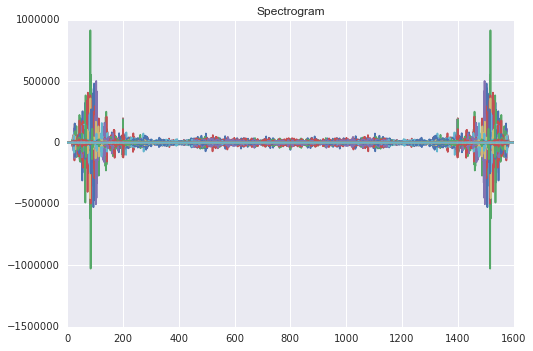

In [374]:
#Spectrogram
Spectrogram = F.dot(X)
plt.title("Spectrogram")
plt.plot(Spectrogram)
plt.show()


C:\Anaconda3\lib\site-packages\numpy\ma\core.py:3194: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


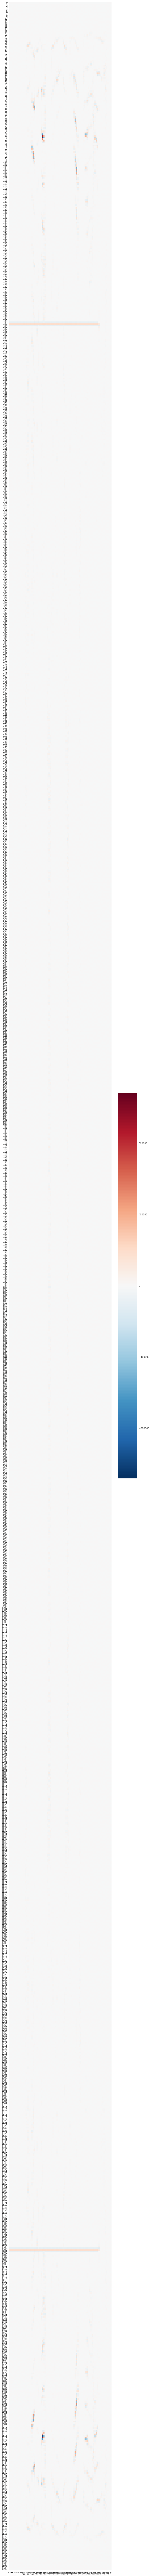

In [254]:
import seaborn as sns
ax = sns.heatmap(Spectrogram)
ax.figure.set_size_inches(10,200)

In [ ]:
Spectrogram[200][:] = 0 + 1j *0 
Spectrogram[1400][:] = 0 + 1j *0
Spectrogram[199][:] = 0 + 1j *0 
Spectrogram[1399][:] = 0 + 1j *0
Spectrogram[201][:] = 0 + 1j *0 
Spectrogram[1401][:] = 0 + 1j *0

### 1.5 - Inverse DFT

In [288]:
F_inverse = R + 1j*I
X_cap = F_inverse.dot(Spectrogram)
X_cap = X_cap.real

In [342]:
X_rec = np.zeros(63488)
k = 0
Na = X_cap.shape[1] 
for i in range(Na):
    
    X_rec[k:k+N] = X_rec[k:k+N] + X_cap[:,i].T
    k = int(k+ N/2)

In [392]:
import scipy.io.wavfile as write
from scipy.io.wavfile import write
X_final = (X_rec).astype(int)
write('output.wav', 16000, X_final)

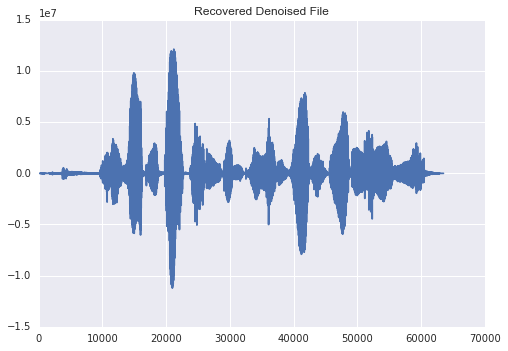

In [373]:
plt.title("Recovered Denoised File")
plt.plot(X_final)
plt.show()

# Q2 - Stereo Matching

### 2.1

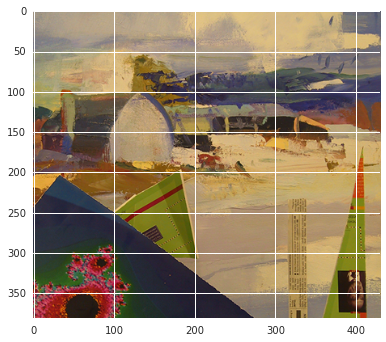

In [383]:
imL = image.imread('im0.ppm')
plt.imshow(imL)
plt.show()

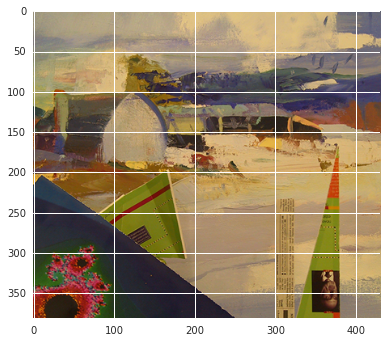

In [384]:
imR = image.imread('im8.ppm')
plt.imshow(imR)
plt.show()

In [8]:
imL.shape

(381, 430, 3)

### 2.3 - Disparity Matrix

In [385]:
window_metric = 40
disparity_matrix = (np.zeros((381,390))).astype(int)

for i in range(381):
    
    
    for j in range (430-window_metric):
        
        right_pixel = imR[i][j]
        index_distance = 0
        lowest_distance = np.sqrt(np.sum((right_pixel - imL[i][j])**2))
        
        
        for k in range(40):
            left_pixel = imL[i][j+k]
            dist = np.sqrt(np.sum((right_pixel - left_pixel)**2))
            
            if (dist < lowest_distance):
                lowest_distance = dist
                index_distance = k
            
        disparity_matrix[i][j] = index_distance
            
            

In [11]:
disparity_matrix.shape

(381, 390)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 381 x 390)
  '(shape is %d x %d)' % inp.shape[::-1])


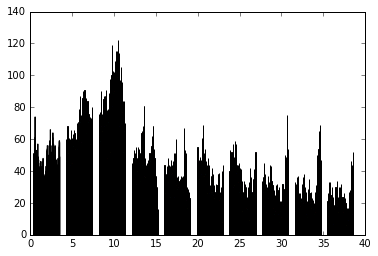

In [12]:
plt.hist(disparity_matrix)
plt.show()

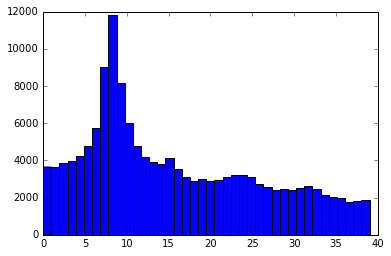

In [69]:
plt.hist(disparity_matrix.ravel(),bins=40)
plt.show()

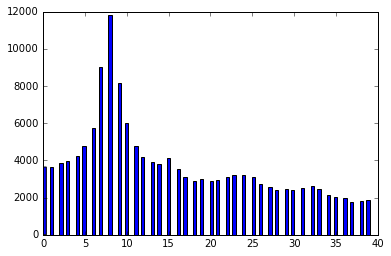

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = disparity_matrix[:,0]
y = disparity_matrix[:,1]

ax.scatter(x, y)
plt.show()

# Q3 - GMM and K-means

### 3.1 K-Means

In [386]:
# Total number of clusters taken is 10
# Initialize centroid 
depth_map = (np.zeros((381,390))).astype(int)
centroid = np.array([2,7,10,12,17,22,26,29,32,37])


In [387]:
# K-means Code
iterations = 10
for iteration in range(iterations):
    
    avg_cluster = {centroid[0]:[],centroid[1]:[],centroid[2]:[],centroid[3]:[],centroid[4]:[],centroid[5]:[],centroid[6]:[],centroid[7]:[],centroid[8]:[],centroid[9]:[]}

    for i in range(disparity_matrix.shape[0]):

        last_assignment_index = 0

        for j in range(disparity_matrix.shape[1]):

            closest_centroid = 0
            #min_distance = np.sum((centroid[0] - disparity_matrix[i][j])**2)
            distance = []
            for k in centroid:
                distance.append(np.sum((k - disparity_matrix[i][j])**2))

                #dist = np.sum((k - disparity_matrix[i][j])**2)

            #Resoliving equidistant cluster problem
            index_min_distance = [i for i,val in enumerate(distance) if val == min(distance)]
            if (len(index_min_distance)>1):
                if last_assignment_index in index_min_distance:
                    closest_centroid = last_assignment_index
                else:
                    closest_centroid = index_min_distance[0]

            else:
                closest_centroid = index_min_distance[0]

            avg_cluster[centroid[closest_centroid]].append(disparity_matrix[i][j])
            depth_map[i][j] = centroid[closest_centroid]
            last_assignment = closest_centroid


    #Re-evaluation of Centroids
    centroid = []
    for i in avg_cluster:
        centroid.append(sum(avg_cluster[i])/len(avg_cluster[i]))

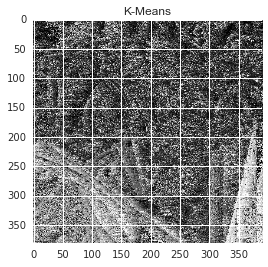

In [390]:
plt.title("K-Means")
plt.imshow(depth_map)
plt.gray()
plt.show()

### 3.2 GMM

In [549]:
# Total number of clusters taken is 10
# Initialize centroid 
depth_map_g = (np.zeros((381,390))).astype(int)
means = np.array([5,18,36])
variance = np.array([2,3,3],dtype=float)
n_clusters = 3
prior = np.array([1/3,1/3,1/3])

In [550]:
def probab(x,u,s):
    part1 = (1/((np.sqrt(2*np.pi)*s)))
    part2 = np.exp(-1*((x-u)**2)/2*s)
    return (part1*part2)

In [551]:
# GMM Code
iterations = 10
posterier_probab = np.zeros((381,390,3))
for iteration in range(iterations):
    n_1 = np.zeros(3)
    d_1 = np.zeros(3)
    n_2 = np.zeros(3)
    

    for i in range(disparity_matrix.shape[0]):

        #last_assignment_index = 0

        for j in range(disparity_matrix.shape[1]):
            
            closest_mean = 0  
            denominator = 0
            # Estimation Step
            for k in range(n_clusters):
            
                denominator+= (prior[k]*probab(disparity_matrix[i][j],means[k],variance[k]))
                #print("numerators:", (prior[k]*probab(disparity_matrix[i][j],means[k],variance[k])))
            #print ("Denominator:",denominator)
            
            for k in range(n_clusters):
            
                    
                posterier_probab[i][j][k] = (prior[k]*probab(disparity_matrix[i][j],means[k],variance[k]))/denominator
            
                # Maximization Calculation
                n_1[k] = n_1[k] + posterier_probab[i][j][k] * disparity_matrix[i][j]
                d_1[k] = d_1[k] + posterier_probab[i][j][k]
                n_2[k] = n_2[k] + posterier_probab[i][j][k] * ((disparity_matrix[i][j] - means[k])**2)
                
                #print (disparity_matrix[i][j],means[k],variance[k])
                #print ((prior[k]*probab(disparity_matrix[i][j],means[k],variance[k])))
                #print ("Denominator:",denominator)
                #print ("Posterior",posterier_probab[i][j][k])
           
    #print ("*****************************Complete****************************************")
    
    #Convergence
    last_mean = np.copy(means)
    
    # Maximization Step
    for k in range(n_clusters):
        
        means[k] = n_1[k]/d_1[k]
        variance[k] = round(d_1[k]/(381*390), 3)
        prior[k] = n_2[k]/d_1[k]
        
    
    #print ("Mean:", means)
    #print ("Variance:", variance)
    #print ("Prior:", prior)
    
    #Convergence Check
    if (np.array_equal(last_mean,means)):
        print ("####################### Convergence Achieved ###########################")
        break

####################### Convergence Achieved ###########################


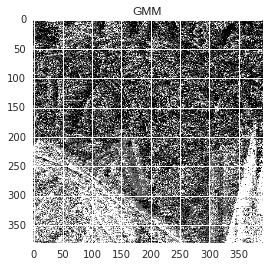

In [552]:
# Forming Depth Map
for i in range(disparity_matrix.shape[0]):

        for j in range(disparity_matrix.shape[1]):
            
            index = np.argmax(posterier_probab[i][j][:])
            depth_map_g[i][j] = means[index]

plt.title("GMM")
plt.imshow(depth_map_g)
plt.gray()
plt.show()       

# Q4 - DCT and PCA

In [4]:
im = image.imread('IMG_1878.JPG')
X_R = im[:,:,0]
X_G = im[:,:,1]
X_B = im[:,:,2]

### 4.2 - (9 blocks)

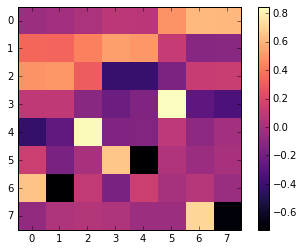

In [85]:
from random import randint

#Power Iteration Routine
def powerIteration(X):
    v_i = np.random.rand(X.shape[1], 1)
    for i in range(5000):
        v_i = np.dot(X,v_i)
        v_i /= np.linalg.norm(v_i)
    return v_i  

start_index = 0
R_3 = []
for i in range(3):
    start_index = randint(0,1015)
    R_3.append(X_R[start_index:start_index+8][:])

#Random 3 row from Green
start_index = 0
G_3 = []
for i in range(3):
    start_index = randint(0,1015)
    G_3.append(X_G[start_index:start_index+8][:])

#Random 3 row from Blue
start_index = 0
B_3 = []
for i in range(3):
    start_index = randint(0,1015)
    B_3.append(X_B[start_index:start_index+8][:])

R_3 = np.array(R_3)
G_3 = np.array(G_3)
B_3 = np.array(B_3)

R_3 = R_3.reshape((8,3*768))
G_3 = G_3.reshape((8,3*768))
B_3 = B_3.reshape((8,3*768))

R = np.hstack((R_3,G_3, B_3))

rows_mean = np.zeros((8,1))
for i in range(R.shape[0]):
    rows_mean[i] = np.mean(R[i])

R_dash = R - rows_mean

covariance_matrix = np.dot(R_dash, R_dash.T)/R.shape[0]

eigen_vectors = []
eigen_values = []

for i in range(8):
    eigen_vectors.append(powerIteration(covariance_matrix))
    eigen_values.append(np.dot(covariance_matrix, eigen_vectors[i])/eigen_vectors[i])
    covariance_matrix = covariance_matrix - eigen_values[i] * np.dot(eigen_vectors[i], eigen_vectors[i].T)
    
W = np.hstack(eigen_vectors)
PCA_result = np.dot(W.T,R)
plt.imshow(W.T, cmap='magma', interpolation='nearest')
plt.colorbar()
plt.show()


### 4.3 - (90 blocks)

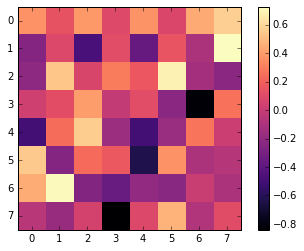

In [86]:
start_index = 0
R_30 = []
for i in range(30):
    start_index = randint(0,1015)
    R_30.append(X_R[start_index:start_index+8][:])

#Random 3 row from Green
start_index = 0
G_30 = []
for i in range(30):
    start_index = randint(0,1015)
    G_30.append(X_G[start_index:start_index+8][:])

#Random 3 row from Blue
start_index = 0
B_30 = []
for i in range(30):
    start_index = randint(0,1015)
    B_30.append(X_B[start_index:start_index+8][:])

R_30 = np.array(R_30)
G_30 = np.array(G_30)
B_30 = np.array(B_30)

R_30 = R_30.reshape((8,30*768))
G_30 = G_30.reshape((8,30*768))
B_30 = B_30.reshape((8,30*768))

R = np.hstack((R_30,G_30, B_30))

rows_mean = np.zeros((8,1))
for i in range(R.shape[0]):
    rows_mean[i] = np.mean(R[i])

R_dash = R - rows_mean

covariance_matrix = np.dot(R_dash, R_dash.T)/R.shape[0]

eigen_vectors = []
eigen_values = []

for i in range(8):
    eigen_vectors.append(powerIteration(covariance_matrix))
    eigen_values.append(np.dot(covariance_matrix, eigen_vectors[i])/eigen_vectors[i])
    covariance_matrix = covariance_matrix - eigen_values[i] * np.dot(eigen_vectors[i], eigen_vectors[i].T)
    
W = np.hstack(eigen_vectors)
PCA_result = np.dot(W.T,R)
plt.imshow(W.T, cmap='magma', interpolation='nearest')
plt.colorbar()
plt.show()